In [1]:
import pandas as pd

data = pd.read_csv("//content/creditcard.csv")

print(data.head())
print(data.info())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalize the 'Amount' column
scaler = StandardScaler()
data['NormalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Drop irrelevant columns
X = data.drop(['Class', 'Time', 'Amount'], axis=1)
y = data['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
print(y_train.isnull().sum())

1


In [9]:
# Remove rows with NaNs
data = data.dropna()

# Then split
X = data.drop('Class', axis=1)
y = data['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Output the results
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Confusion Matrix:
 [[12255     0]
 [   10    33]]
Accuracy: 0.9992
Precision: 1.0000
Recall: 0.7674
F1-Score: 0.8684


In [12]:
from sklearn.ensemble import RandomForestClassifier


In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/creditcard.csv')

# Step 2: Define X (features) and y (target/labels)
X = df.drop('Class', axis=1)  # Features (drop the target column)
y = df['Class']  # Target

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Dictionary to store model performance metrics
model_performance = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Step 5: Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    model_performance["Model"].append(model_name)
    model_performance["Accuracy"].append(accuracy_score(y_test, y_pred))
    model_performance["Precision"].append(precision_score(y_test, y_pred))
    model_performance["Recall"].append(recall_score(y_test, y_pred))
    model_performance["F1-Score"].append(f1_score(y_test, y_pred))

performance_df = pd.DataFrame(model_performance)

print(performance_df)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                    Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.998631   0.611111  0.561224  0.585106
1  Support Vector Machine  0.998280   0.000000  0.000000  0.000000
2           Decision Tree  0.999087   0.716981  0.775510  0.745098
3     K-Nearest Neighbors  0.998367   1.000000  0.051020  0.097087
4           Random Forest  0.999561   0.974026  0.765306  0.857143


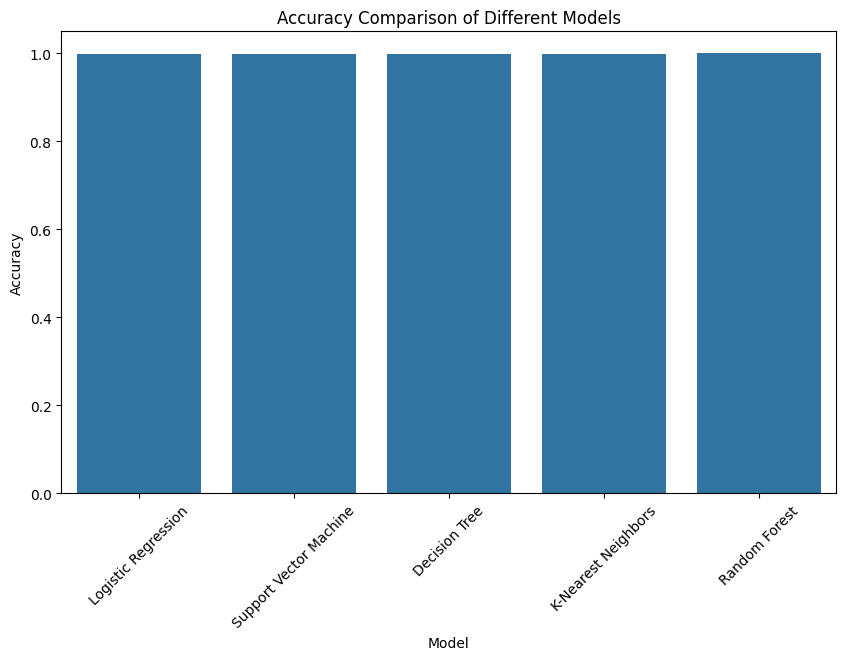

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=performance_df)
plt.title("Accuracy Comparison of Different Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()


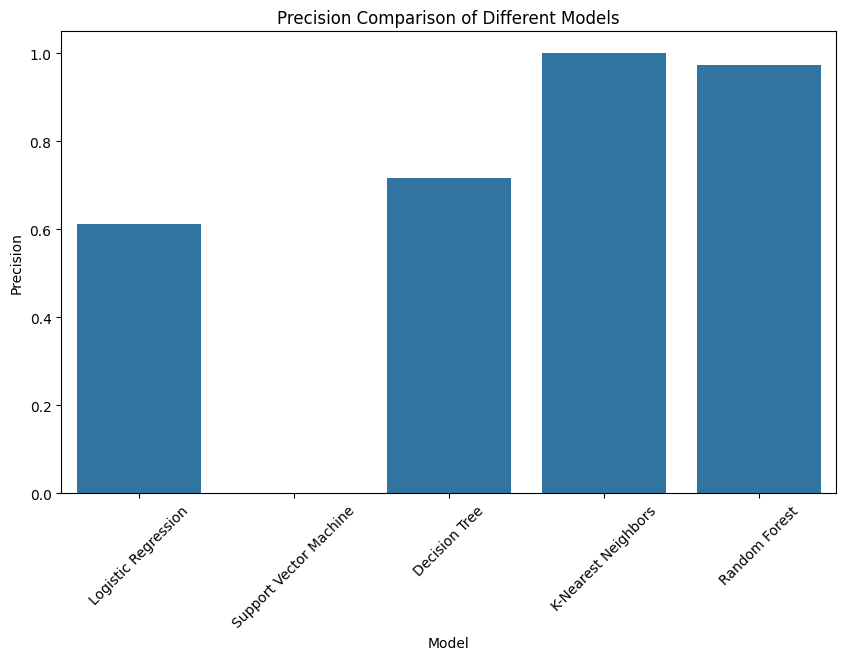

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Precision comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Precision", data=performance_df)
plt.title("Precision Comparison of Different Models")
plt.ylabel("Precision")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()



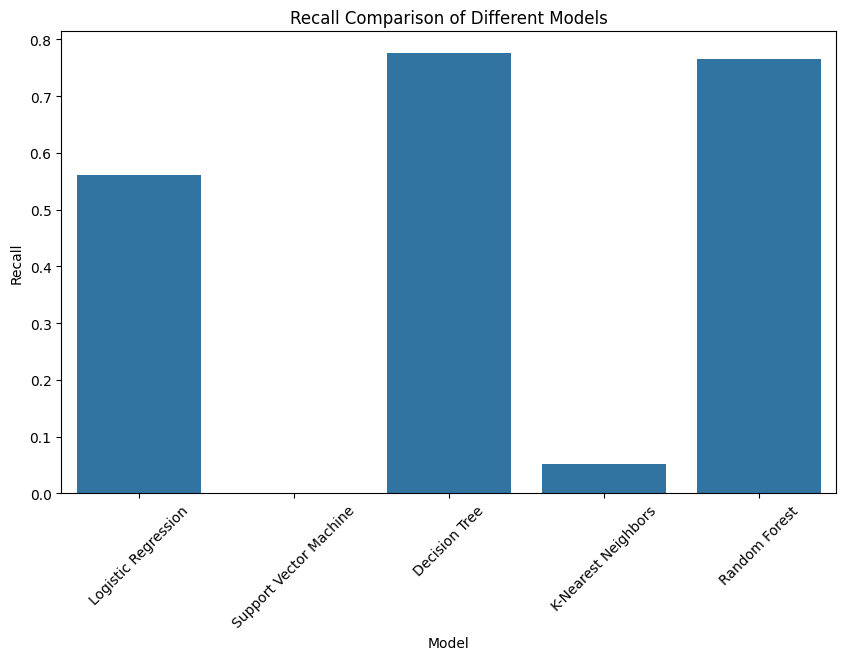

In [17]:
# Plot Recall comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Recall", data=performance_df)
plt.title("Recall Comparison of Different Models")
plt.ylabel("Recall")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()



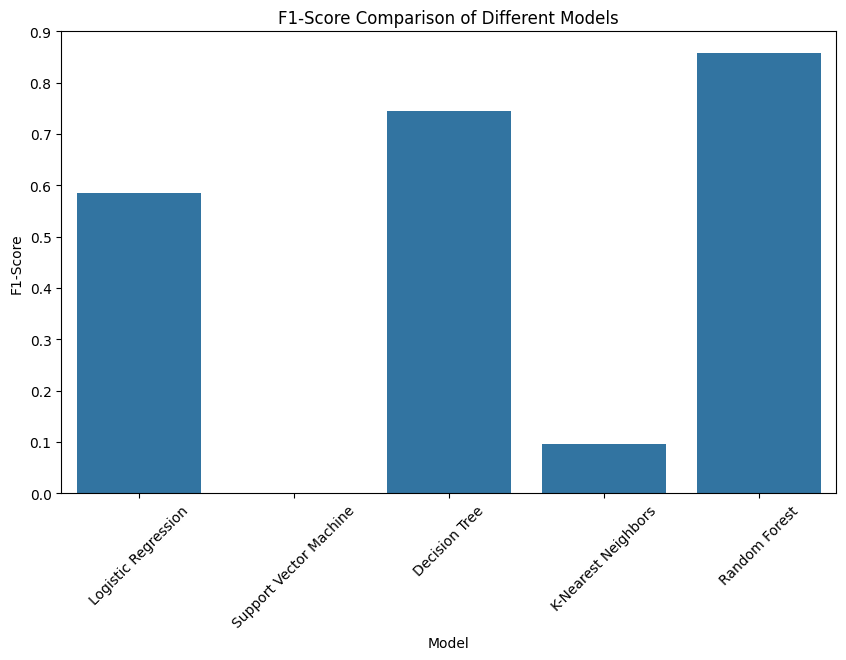

In [18]:
# Plot F1-Score comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="F1-Score", data=performance_df)
plt.title("F1-Score Comparison of Different Models")
plt.ylabel("F1-Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()
